In [ ]:
import networkx as nx
import numpy as np

In [ ]:
ad_matrix = np.array([
             [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
             [1,0,1,0,1,0,0,0,0,0,0,0,0,0,0],
             [0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
             [0,0,1,0,0,1,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,1,0,0,1,0,0,0,0,0,0],
             [0,0,0,1,1,0,1,0,0,1,0,0,0,0,0],
             [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
             [0,0,0,0,1,0,0,0,0,1,1,0,0,0,0],
             [0,0,0,0,0,1,0,0,1,0,1,0,0,0,0],
             [0,0,0,0,0,0,0,0,1,1,0,1,0,1,0],
             [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
             [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0],
             [0,0,0,0,0,0,0,0,0,0,1,0,1,0,1],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
             ]
             )

In [ ]:
labeldict = {}
labeldict[0] = "Estambul"
labeldict[1] = "Bursa"
labeldict[2] = "Balikesir"
labeldict[3] = "Esmirna"
labeldict[4] = "Eskisehir"
labeldict[5] = "Afyonkarahisar"
labeldict[6] = "Isparta"
labeldict[7] = "Antalya"
labeldict[8] = "Ankara"
labeldict[9] = "Konya"
labeldict[10] = "Kayseri"
labeldict[11] = "Mersin"
labeldict[12] = "Gazintep"
labeldict[13] = "Malatya"
labeldict[14] = "Erzurum"


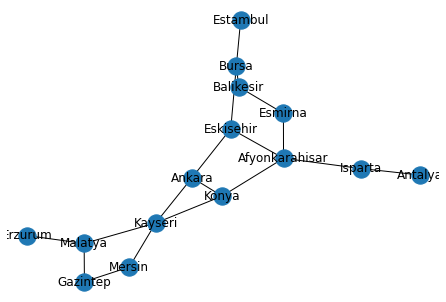

In [ ]:
H = nx.from_numpy_array(ad_matrix)
nx.draw(H, labels = labeldict, with_labels=1)

In [ ]:
import math

In [ ]:
coord = np.array([
             [41.0122, 28.9760],
             [40.1955, 29.0601],
             [39.7408, 27.8191],
             [38.4127, 27.1383],
             [39.7712, 30.5135],
             [38.7580, 30.5386],
             [37.7666, 30.5478],
             [36.9081, 30.6955],
             [39.9272, 32.8644],
             [37.8725, 32.4920],
             [38.7211, 35.4846],
             [36.8119, 34.6388],
             [37.0657, 37.3772],
             [38.3553, 38.3336],
             [40.0630, 41.5669]
             ]
             )

In [ ]:
def dist (index_1, index_2):
  lat1 = math.radians(coord[index_1][0])
  lat2 = math.radians(coord[index_2][0])
  lon1 = math.radians(coord[index_1][1])
  lon2 = math.radians(coord[index_2][1])

  sin_lat1 = math.sin(lat1)
  sin_lat2 = math.sin(lat2)
  cos_lat1 = math.cos(lat1)
  cos_lat2 = math.cos(lat2)
  cos_l2_l1 = math.cos(lon2-lon1)

  dg = math.acos(sin_lat1*sin_lat2 + cos_lat1*cos_lat2*cos_l2_l1)
  d = 6378.137 * dg

  return d

In [ ]:
def expandir_i (index, calls):
  calls+=1
  min = 99999999
  next_index = index

  for i in range(15):
    if ad_matrix[index][i] == 1:
      if i not in nodos_ex_m:
        cost_f = distances[i] + dist(index, i, )
        cost_functions.append([calls,i,cost_f])
        print("Posible ruta: ", labeldict[i], ". Función de Costo: ", cost_f)
        if cost_f < min:
          min = cost_f
          next_index = i

  for i in range(len(cost_functions)):
    if cost_functions[i][2] < min:
      if cost_functions[i][1] != index:
        min = cost_functions[i][2]
        next_index = cost_functions[i][1]
        print("Hay una mejor ruta por una ciudad evaluada antes:", labeldict[next_index], "Nivel:", cost_functions[i][0])
        calls = cost_functions[i][0]


  
  if next_index not in nodos_ex_m: 
    print("Ruta escogida: ",labeldict[next_index])        
    print()
    nodos_ex_m.append(next_index)
    for j in range(calls):
      print("-", end="") #Añadir guiones
    print(next_index, labeldict[next_index])
    if next_index == destino:
      print("Hemos hallado una ruta a", labeldict[destino])
    else:
      expandir_i(next_index, calls)


In [ ]:
inicio = 8
destino = 11
calls = 0

In [ ]:
nodos_ex_m = []
 
distances = []
cost_functions = np.array(3)
cost_functions = []

print("|||||||||||| Calculando ruta desde ", labeldict[inicio], "hacia ", labeldict[destino], "||||||||||||||||")
print()

for i in range(15):
  distances.append(dist(i,destino))

print(inicio, labeldict[inicio])
nodos_ex_m.append(inicio)
calls = 0
expandir_i(inicio, calls)

|||||||||||| Calculando ruta desde  Eskisehir hacia  Mersin ||||||||||||||||

4 Eskisehir
Posible ruta:  Bursa . Función de Costo:  747.3047019296614
Posible ruta:  Afyonkarahisar . Función de Costo:  533.5226918036293
Posible ruta:  Ankara . Función de Costo:  581.4374101369019
Ruta escogida:  Afyonkarahisar

-5 Afyonkarahisar
Posible ruta:  Esmirna . Función de Costo:  983.1211922070652
Posible ruta:  Isparta . Función de Costo:  487.90897585759444
Posible ruta:  Konya . Función de Costo:  420.7184551803607
Ruta escogida:  Konya

--9 Konya
Posible ruta:  Ankara . Función de Costo:  610.7692005992806
Posible ruta:  Kayseri . Función de Costo:  503.1573400197503
Hay una mejor ruta por una ciudad evaluada antes: Isparta Nivel: 2
Ruta escogida:  Isparta

--6 Isparta
Posible ruta:  Antalya . Función de Costo:  447.8142707658358
Hay una mejor ruta por una ciudad evaluada antes: Konya Nivel: 2


In [ ]:
cost_functions

[[1, 4, 689.8496629675417],
 [1, 9, 454.67343107660747],
 [1, 10, 487.7263475683084],
 [2, 5, 617.7496318060256],
 [2, 10, 503.1573400197503],
 [3, 11, 225.18403789567537],
 [3, 13, 619.7912087221963]]